In [ ]:
library(dplyr)
library(readr)
library(stringr)
library(tidyr)
library(ggplot2)

In [ ]:
process_and_visualize_dependencies <- function(data) {
  # Cleaning the Dependencies column by removing square brackets
  data$Dependencies <- gsub("\\[|\\]", "", data$Dependencies)

  # Splitting the data into separate rows for each tag and filtering out "punct" tags
  data <- data %>%
    separate_rows(Dependencies, sep = ", ") %>%
    filter(Dependencies != "'punct'")

  # Calculating the frequency of dependencies by language
  dependency_freq_lang <- data %>%
    group_by(Language, Dependencies) %>%
    summarise(Freq = n(), .groups = 'drop') %>%
    arrange(desc(Freq))

  # Splitting the table into two based on language
  languages <- unique(dependency_freq_lang$Language)
  lang_tables <- lapply(languages, function(lang) {
    dependency_freq_lang %>% filter(Language == lang)
  })
  names(lang_tables) <- languages

  # Printing individual tables
  for (lang in names(lang_tables)) {
    cat("\nTable for language:", lang, "\n")
    print(head(lang_tables[[lang]], 10))
  }

  # Combining data for frequency comparison
  combined_freq <- dependency_freq_lang %>%
    pivot_wider(names_from = Language, values_from = Freq, values_fill = 0) %>%
    pivot_longer(cols = -Dependencies, names_to = "Language", values_to = "Freq") %>%
    arrange(desc(Freq))

  # Visualizing the comparative frequency chart
  plot_comparative <- ggplot(combined_freq, aes(x = reorder(Dependencies, Freq), y = Freq, fill = Language)) +
    geom_bar(stat = "identity", position = "dodge") +
    coord_flip() +
    labs(title = "Comparative Frequency of Syntactic Dependencies Between English and Russian",
         x = "Syntactic Dependency",
         y = "Frequency",
         fill = "Language") +
    theme_minimal()
  print(plot_comparative)

  # Counting unique tags for each language
  unique_tags_count <- dependency_freq_lang %>%
    group_by(Language) %>%
    summarise(Unique_Tags = n_distinct(Dependencies))

  # Printing the number of unique tags for each language
  print(unique_tags_count)

  # Visualizing the data
  plot_unique_tags <- ggplot(unique_tags_count, aes(x = Language, y = Unique_Tags, fill = Language)) +
    geom_bar(stat = "identity", alpha = 0.7) +
    labs(title = "Number of Unique Syntactic Dependencies Tags by Language",
         x = "Language",
         y = "Number of Unique Tags") +
    theme_minimal()
  print(plot_unique_tags)
}

In [ ]:
visualize_total_sentences_and_tokens <- function(data) {

  # Calculate the total number of sentences
  total_sentences <- data %>%
    group_by(Language) %>%
    summarise(Total_Sentences = n_distinct(paste(Text_ID, Sentence_Number, sep = "_")))
  print(total_sentences)

  total_sentences_plot <- ggplot(total_sentences, aes(x = Language, y = Total_Sentences, fill = Language)) +
    geom_bar(stat = "identity", alpha = 0.7) +
    labs(title = "Total Number of Sentences by Language",
         x = "Language",
         y = "Total Number of Sentences") +
    theme_minimal()

  print(total_sentences_plot)

  # Calculate the total number of tokens
  data$Tokens <- gsub("\\[|\\]", "", data$Tokens)  # Remove square brackets
  data$Tokens <- gsub("'", "", data$Tokens)  # Remove single quotes

  # Split the Tokens column into separate words and count them
  total_tokens <- data %>%
    mutate(Tokens = str_split(Tokens, ", ")) %>%
    unnest(Tokens) %>%
    group_by(Language) %>%
    summarise(Total_Tokens = n())

  print(total_tokens)

  total_tokens_plot <- ggplot(total_tokens, aes(x = Language, y = Total_Tokens, fill = Language)) +
    geom_bar(stat = "identity", alpha = 0.7) +
    labs(title = "Total Number of Tokens by Language",
         x = "Language",
         y = "Total Number of Tokens") +
    theme_minimal()

  print(total_tokens_plot)
}



In [ ]:
# Function to calculate and visualize the total number of tokens
visualize_total_tokens <- function(data) {

  # Calculate the total number of tokens
  total_tokens <- data %>%
    group_by(Language) %>%
    summarise(Total_Tokens = n())

  print(total_tokens)

  total_tokens_plot <- ggplot(total_tokens, aes(x = Language, y = Total_Tokens, fill = Language)) +
    geom_bar(stat = "identity", alpha = 0.7) +
    labs(title = "Total Number of Tokens by Language",
         x = "Language",
         y = "Total Number of Tokens") +
    theme_minimal()

  print(total_tokens_plot)

}

In [ ]:
# Function to calculate and visualize the average number of tags per sentence
visualize_avg_tag_count <- function(data) {
  # Cleaning the Dependencies column by removing square brackets
  data$Dependencies <- gsub("\\[|\\]", "", data$Dependencies)

  # Splitting the data into separate rows for each tag and filtering out "punct" tags
  data <- data %>%
    separate_rows(Dependencies, sep = ", ") %>%
    filter(Dependencies != "punct")  # Исключение "punct" тегов

  # Counting the number of tags in each sentence
  sentence_tag_counts <- data %>%
    group_by(Language, Text_ID, Sentence_Number) %>%
    summarise(Tag_Count = n(), .groups = 'drop')

  # Calculating the average number of tags per sentence for each language
  avg_tag_count_per_sentence <- sentence_tag_counts %>%
    group_by(Language) %>%
    summarise(Average_Tag_Count = mean(Tag_Count), .groups = 'drop')

  print(avg_tag_count_per_sentence)

  avg_tag_count_plot <- ggplot(avg_tag_count_per_sentence, aes(x = Language, y = Average_Tag_Count, fill = Language)) +
    geom_bar(stat = "identity", alpha = 0.7) +
    labs(title = "Average Number of Tags per Sentence by Language",
         x = "Language",
         y = "Average Number of Tags per Sentence") +
    theme_minimal()

  print(avg_tag_count_plot)

  # Visualizing the distribution of the number of tags per sentence for each language
  distribution_plot <- ggplot(sentence_tag_counts, aes(x = Tag_Count, fill = Language)) +
    geom_histogram(binwidth = 1, alpha = 0.7, position = "identity") +
    facet_wrap(~ Language, scales = "free_y") +
    labs(title = "Distribution of the Number of Tags per Sentence by Language",
         x = "Number of Tags per Sentence",
         y = "Frequency") +
    theme_minimal() +
    scale_fill_brewer(palette = "Set2")

  print(distribution_plot)
}

In [ ]:
# Function to calculate and visualize the average sentence length
visualize_avg_sentence_length <- function(data) {
  # Cleaning the Tokens column by removing square brackets and single quotes
  data$Tokens <- gsub("\\[|\\]", "", data$Tokens)
  data$Tokens <- gsub("'", "", data$Tokens)

 # Counting the number of words in each sentence
  data <- data %>%
    mutate(Word_Count = str_count(Tokens, "\\w+"))

  # Calculating the average number of words per sentence for each language
  avg_sentence_length <- data %>%
    group_by(Language) %>%
    summarise(Average_Word_Count = mean(Word_Count), .groups = 'drop')

  print(avg_sentence_length)

  # Visualizing the average sentence length
  avg_sentence_length_plot <- ggplot(avg_sentence_length, aes(x = Language, y = Average_Word_Count, fill = Language)) +
    geom_bar(stat = "identity", alpha = 0.7) +
    labs(title = "Average Sentence Length by Language",
         x = "Language",
         y = "Average Number of Words") +
    theme_minimal()

  print(avg_sentence_length_plot)
}

# Analysis of Laighther in the Dark

In [ ]:
data <- read_csv("/content/laughter_in_the_dark_syntactic_dependencies.csv")

Rows: 7345 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (7): Sentence, Tokens, Lemmas, POS_Tags, Dependencies, Heads, Language
dbl (2): Text_ID, Sentence_Number

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [ ]:
head(data)

Text_ID,Sentence_Number,Sentence,Tokens,Lemmas,POS_Tags,Dependencies,Heads,Language
<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,1,1,['1'],['1'],['NUM'],['root'],['ROOT'],en
2,1,"ONCE upon a time there lived in Berlin, Germany, a man called Albinus.","['ONCE', 'upon', 'a', 'time', 'there', 'lived', 'in', 'Berlin', ',', 'Germany', ',', 'a', 'man', 'called', 'Albinus', '.']","['once', 'upon', 'a', 'time', 'there', 'live', 'in', 'Berlin', ',', 'Germany', ',', 'a', 'man', 'call', 'Albinus', '.']","['ADV', 'ADP', 'DET', 'NOUN', 'PRON', 'VERB', 'ADP', 'PROPN', 'PUNCT', 'PROPN', 'PUNCT', 'DET', 'NOUN', 'VERB', 'PROPN', 'PUNCT']","['advmod', 'case', 'det', 'obl', 'expl', 'root', 'case', 'obl', 'punct', 'appos', 'punct', 'det', 'appos', 'acl', 'xcomp', 'punct']","['lived', 'time', 'time', 'lived', 'lived', 'ROOT', 'Berlin', 'lived', 'Berlin', 'Berlin', 'Berlin', 'man', 'Berlin', 'man', 'called', 'lived']",en
2,2,"He was rich, respectable, happy; one day he abandoned his wife for the sake of a youthful mistress; he loved; was not loved; and his life ended in disaster.","['He', 'was', 'rich', ',', 'respectable', ',', 'happy', ';', 'one', 'day', 'he', 'abandoned', 'his', 'wife', 'for', 'the', 'sake', 'of', 'a', 'youthful', 'mistress', ';', 'he', 'loved', ';', 'was', 'not', 'loved', ';', 'and', 'his', 'life', 'ended', 'in', 'disaster', '.']","['he', 'be', 'rich', ',', 'respectable', ',', 'happy', ';', 'one', 'day', 'he', 'abandon', 'his', 'wife', 'for', 'the', 'sake', 'of', 'a', 'youthful', 'mistress', ';', 'he', 'love', ';', 'be', 'not', 'love', ';', 'and', 'his', 'life', 'end', 'in', 'disaster', '.']","['PRON', 'AUX', 'ADJ', 'PUNCT', 'ADJ', 'PUNCT', 'ADJ', 'PUNCT', 'NUM', 'NOUN', 'PRON', 'VERB', 'PRON', 'NOUN', 'ADP', 'DET', 'NOUN', 'ADP', 'DET', 'ADJ', 'NOUN', 'PUNCT', 'PRON', 'VERB', 'PUNCT', 'AUX', 'PART', 'VERB', 'PUNCT', 'CCONJ', 'PRON', 'NOUN', 'VERB', 'ADP', 'NOUN', 'PUNCT']","['nsubj', 'cop', 'root', 'punct', 'conj', 'punct', 'conj', 'punct', 'nummod', 'obl:tmod', 'nsubj', 'parataxis', 'nmod:poss', 'obj', 'case', 'det', 'obl', 'case', 'det', 'amod', 'nmod', 'punct', 'nsubj', 'parataxis', 'punct', 'aux:pass', 'advmod', 'parataxis', 'punct', 'cc', 'nmod:poss', 'nsubj', 'conj', 'case', 'obl', 'punct']","['rich', 'rich', 'ROOT', 'respectable', 'rich', 'happy', 'rich', 'abandoned', 'day', 'abandoned', 'abandoned', 'rich', 'wife', 'abandoned', 'sake', 'sake', 'abandoned', 'mistress', 'mistress', 'mistress', 'sake', 'loved', 'loved', 'rich', 'loved', 'loved', 'loved', 'loved', 'ended', 'ended', 'life', 'ended', 'abandoned', 'disaster', 'ended', 'rich']",en
8,1,"“I’m afraid it’s no good,” said the other.","['“', 'I', '’m', 'afraid', 'it', '’s', 'no', 'good', ',', '”', 'said', 'the', 'other', '.']","[""''"", 'I', 'be', 'afraid', 'it', 'be', 'no', 'good', ',', ""''"", 'say', 'the', 'other', '.']","['PUNCT', 'PRON', 'AUX', 'ADJ', 'PRON', 'AUX', 'DET', 'ADJ', 'PUNCT', 'PUNCT', 'VERB', 'DET', 'ADJ', 'PUNCT']","['punct', 'nsubj', 'cop', 'ccomp', 'nsubj', 'cop', 'det', 'ccomp', 'punct', 'punct', 'root', 'det', 'nsubj', 'punct']","['afraid', 'afraid', 'afraid', 'said', 'good', 'good', 'good', 'afraid', 'afraid', 'afraid', 'ROOT', 'other', 'said', 'said']",en
8,2,“We can’t risk fancy pictures.”,"['“', 'We', 'ca', 'n’t', 'risk', 'fancy', 'pictures', '.', '”']","[""''"", 'we', 'can', 'not', 'risk', 'fancy', 'picture', '.', ""''""]","['PUNCT', 'PRON', 'AUX', 'PART', 'VERB', 'ADJ', 'NOUN', 'PUNCT', 'PUNCT']","['punct', 'nsubj', 'aux', 'advmod', 'root', 'amod', 'obj', 'punct', 'punct']","['risk', 'risk', 'risk', 'risk', 'ROOT', 'pictures', 'risk', 'risk', 'risk']",en
3,1,"This is the whole of the story and we might have left it at that had there not been profit and pleasure in the telling; and although there is plenty of space on a gravestone to contain, bound in moss, the abridged version of a man’s life, detail is always welcome.","['This', 'is', 'the', 'whole', 'of', 'the', 'story', 'and', 'we', 'might', 'have', 'left', 'it', 'at', 'that

In [ ]:
str(data)

spc_tbl_ [7,345 × 9] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ Text_ID        : num [1:7345] 1 2 2 8 8 3 13 7 7 10 ...
 $ Sentence_Number: num [1:7345] 1 1 2 1 2 1 1 1 2 1 ...
 $ Sentence       : chr [1:7345] "1" "ONCE upon a time there lived in Berlin, Germany, a man called Albinus." "He was rich, respectable, happy; one day he abandoned his wife for the sake of a youthful mistress; he loved; w"| __truncated__ "“I’m afraid it’s no good,” said the other." ...
 $ Tokens         : chr [1:7345] "['1']" "['ONCE', 'upon', 'a', 'time', 'there', 'lived', 'in', 'Berlin', ',', 'Germany', ',', 'a', 'man', 'called', 'Albinus', '.']" "['He', 'was', 'rich', ',', 'respectable', ',', 'happy', ';', 'one', 'day', 'he', 'abandoned', 'his', 'wife', 'f"| __truncated__ "['“', 'I', '’m', 'afraid', 'it', '’s', 'no', 'good', ',', '”', 'said', 'the', 'other', '.']" ...
 $ Lemmas         : chr [1:7345] "['1']" "['once', 'upon', 'a', 'time', 'there', 'live', 'in', 'Berlin', ',', 'Germany', ',', 'a', 'man', 'cal

In [ ]:
summary(data)

    Text_ID       Sentence_Number    Sentence            Tokens         
 Min.   :   1.0   Min.   : 1.000   Length:7345        Length:7345       
 1st Qu.: 275.0   1st Qu.: 1.000   Class :character   Class :character  
 Median : 617.0   Median : 2.000   Mode  :character   Mode  :character  
 Mean   : 641.9   Mean   : 3.519                                        
 3rd Qu.: 934.0   3rd Qu.: 4.000                                        
 Max.   :1560.0   Max.   :29.000                                        
    Lemmas            POS_Tags         Dependencies          Heads          
 Length:7345        Length:7345        Length:7345        Length:7345       
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                           


Table for language: en 
# A tibble: 10 × 3
   Language Dependencies  Freq
   <chr>    <chr>        <int>
 1 en       'nsubj'       6422
 2 en       'case'        5606
 3 en       'det'         5175
 4 en       'advmod'      4728
 5 en       'root'        3837
 6 en       'obl'         3594
 7 en       'amod'        3079
 8 en       'obj'         2996
 9 en       'conj'        2289
10 en       'cc'          2149

Table for language: ru 
# A tibble: 10 × 3
   Language Dependencies  Freq
   <chr>    <chr>        <int>
 1 ru       'nsubj'       5185
 2 ru       'advmod'      4642
 3 ru       'obl'         4436
 4 ru       'case'        4326
 5 ru       'conj'        4056
 6 ru       'root'        3508
 7 ru       'amod'        2481
 8 ru       'obj'         2104
 9 ru       'cc'          2073
10 ru       'parataxis'   1807
# A tibble: 2 × 2
  Language Unique_Tags
  <chr>          <int>
1 en                49
2 ru                37


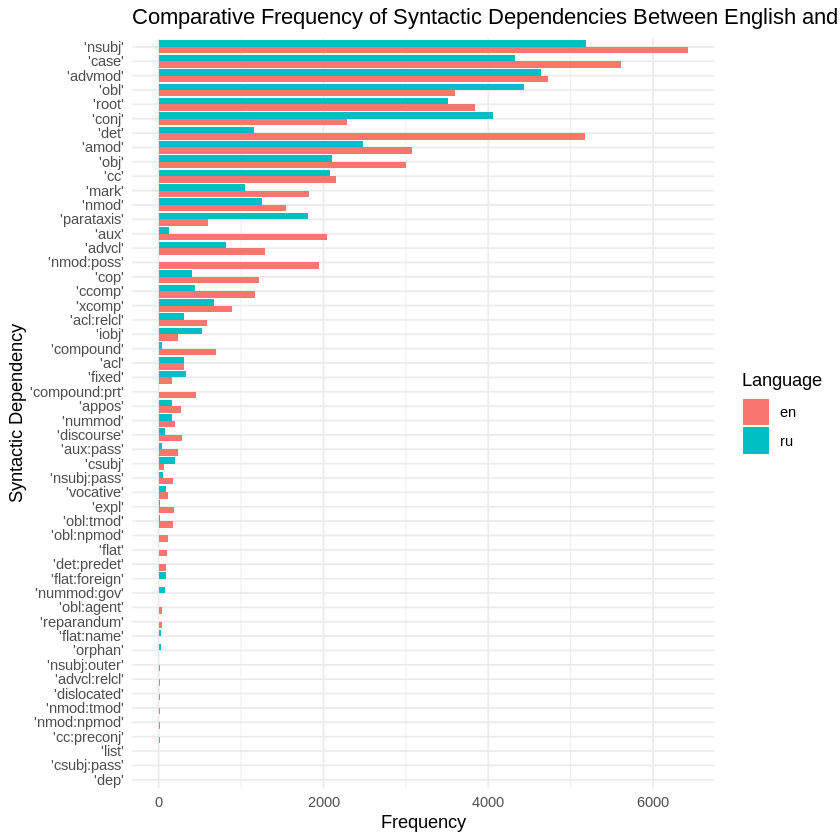

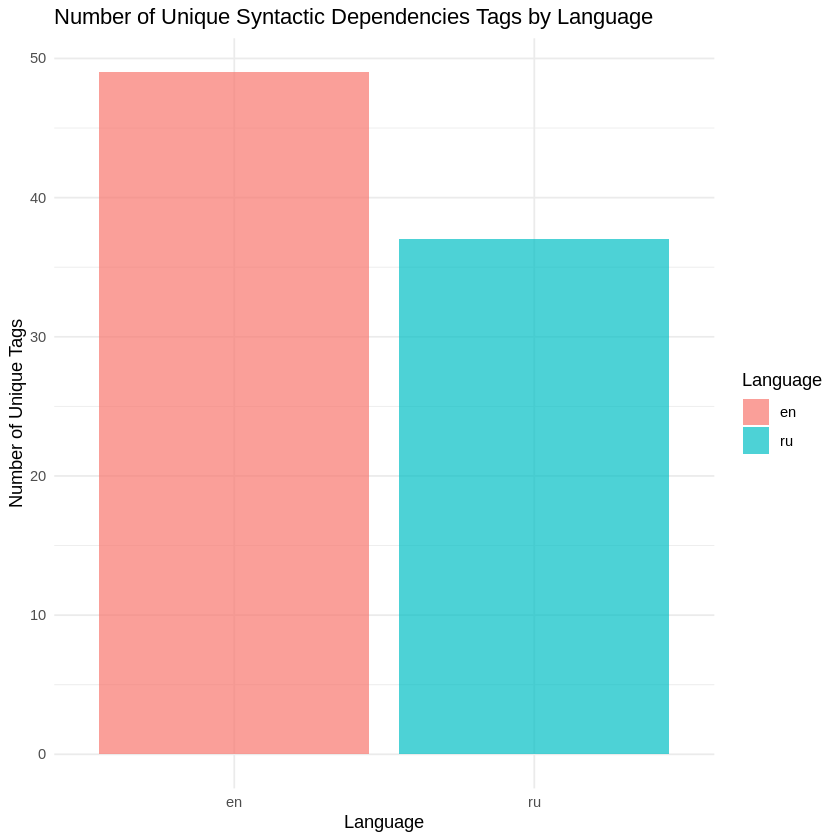

In [ ]:
process_and_visualize_dependencies(data)

**High Frequency of 'nsubj' (Nominal Subject)**

Both the Russian and English versions show a high frequency of 'nsubj'. This indicates Nabokov's consistent use of explicit subjects to clarify the agent of actions, maintaining clarity in both languages. Given that Russian can often drop subjects due to verb conjugations carrying the subject information, the high frequency in both languages suggests a deliberate stylistic choice by Nabokov to keep subjects explicit for emphasis or clarity.

**Difference in 'case' and 'det' (Determiner)**

The English text shows a higher frequency of 'case' and 'det'. English relies heavily on determiners (e.g., "the," "a") to convey specificity and definiteness, which are often integrated into the syntax of sentences. In Russian, definiteness is usually implied through context rather than explicit determiners. This difference highlights a structural adaptation during the translation process to accommodate the grammatical norms of English.

**Use of 'advmod' (Adverbial Modifier)**
The frequency of 'advmod' is high in both languages, reflecting Nabokov's descriptive style. Adverbs add layers of meaning and nuance, which Nabokov uses to enhance the narrative in both Russian and English.

**Presence of 'parataxis' in Russian**
The 'parataxis' tag, indicating the juxtaposition of clauses without conjunctions, is notably present in the Russian version. This stylistic feature is characteristic of Russian literature, which often employs parataxis to create a more flowing and continuous narrative. Nabokov likely used this structure in the original Russian text to maintain a specific rhythm and pace, which he then adapted in the English translation.


The statistical data shows Nabokov awareness of syntactic and grammatical differences, leading to adjustments that preserve the meaning and stylistic integrity of the original text. The increase in unique tags for the English version (49 vs. 37) suggests Nabokov employed a wider variety of syntactic constructions to achieve a similar effect in English, compensating for differences between the languages.

# A tibble: 2 × 2
  Language Total_Sentences
  <chr>              <int>
1 en                  3837
2 ru                  3508
# A tibble: 2 × 2
  Language Total_Tokens
  <chr>           <int>
1 en              68804
2 ru              57576


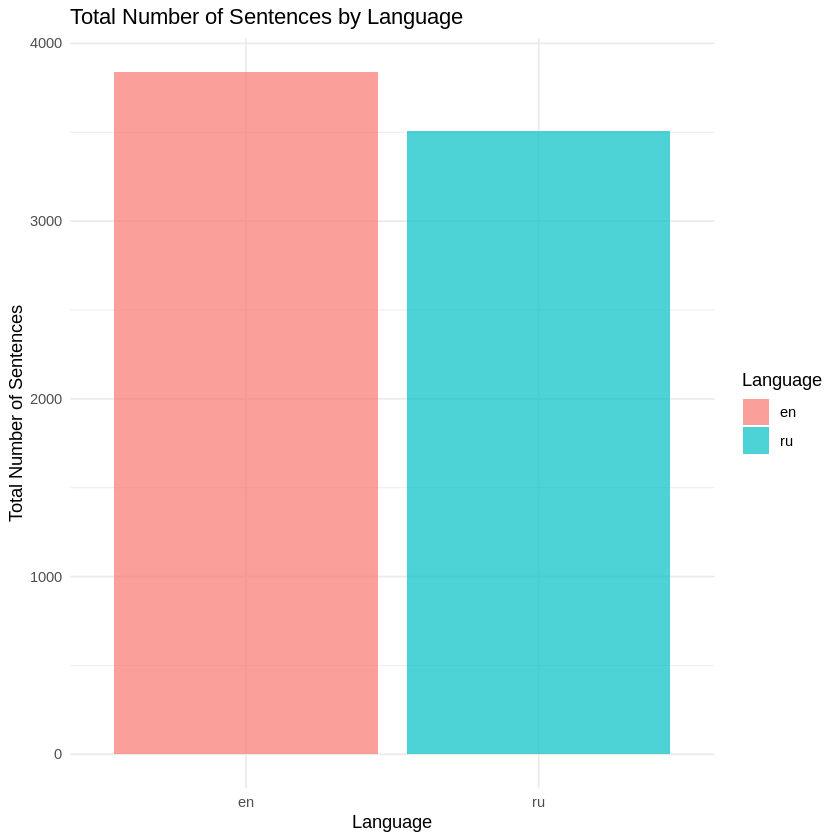

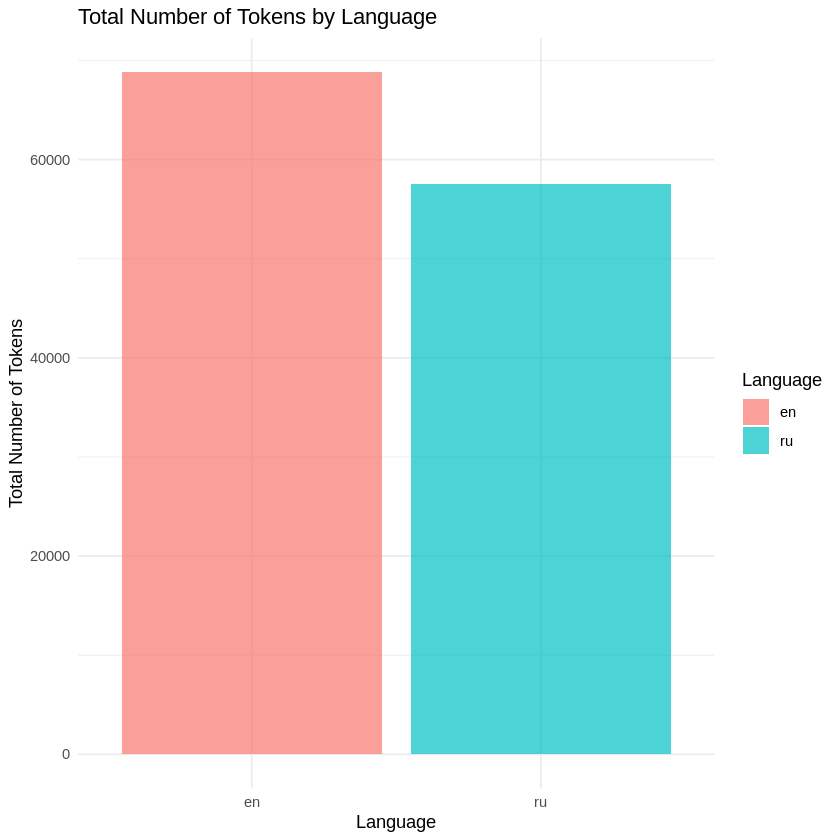

In [ ]:
visualize_total_sentences_and_tokens(data)

**Total Number of Sentences by Language:**

English (en): 3837 sentences

Russian (ru): 3508 sentences

**Conclusion**: The English version of the text has more sentences (3837) compared to the Russian translation (3508). This suggests that Nabokov might have broken down some complex Russian sentences into shorter ones in English, which aligns with the syntactic preferences of the English language.


**Total Number of Tokens by Language**:

English (en): 68804 tokens

Russian (ru): 57576 tokens

**Conclusion**: The English text contains more tokens (68804) than the Russian text (57576). This indicates that the English version uses more words, which might be due to linguistic differences between the two languages. English tends to use more function words, whereas Russian can express similar meanings with fewer words through inflection and syntax.

# A tibble: 2 × 2
  Language Average_Word_Count
  <chr>                 <dbl>
1 en                     14.9
2 ru                     12.4


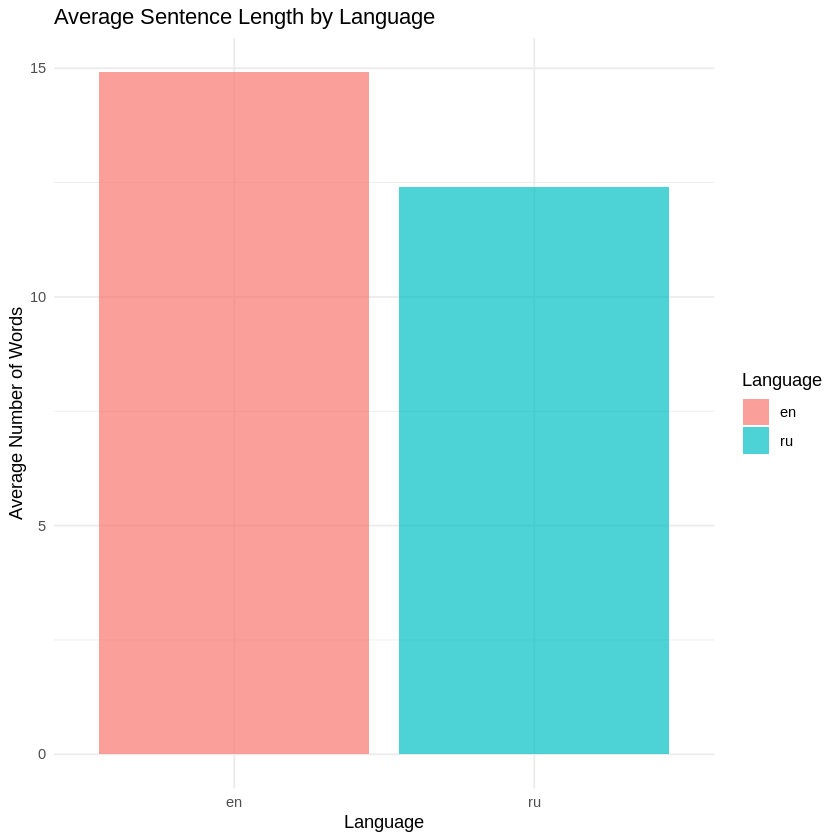

In [ ]:
visualize_avg_sentence_length(data)

The English version has a higher average sentence length (14.9 words) compared to the Russian version (12.4 words). This longer average sentence length in English suggests that Nabokov may have added more descriptive elements, auxiliary verbs, or determiners to preserve the narrative detail and clarity in translation.

# A tibble: 2 × 2
  Language Average_Tag_Count
  <chr>                <dbl>
1 en                    17.9
2 ru                    16.4


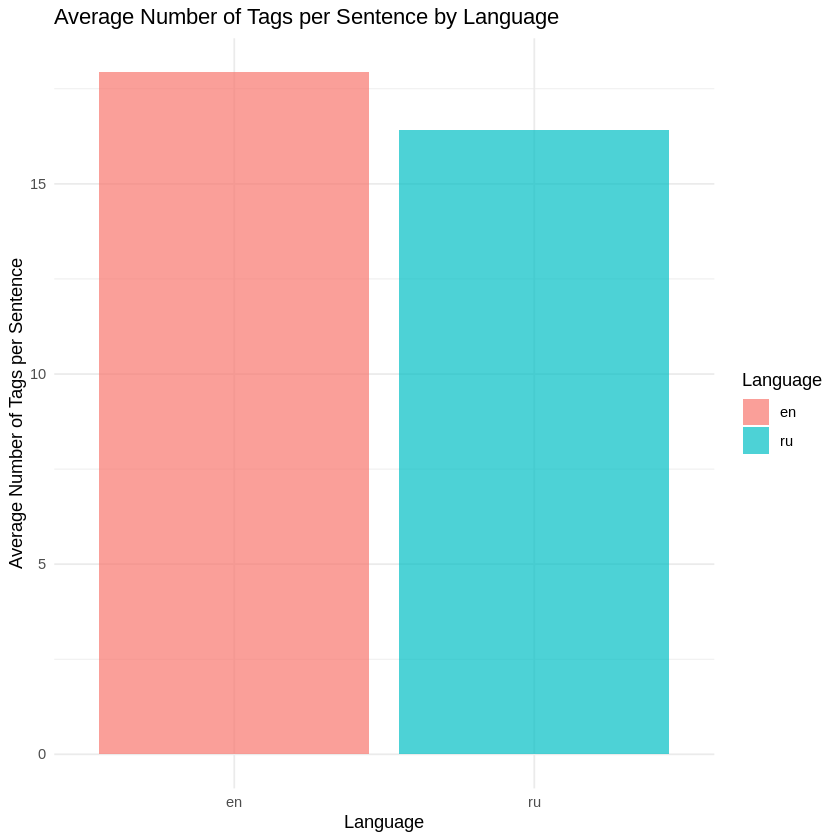

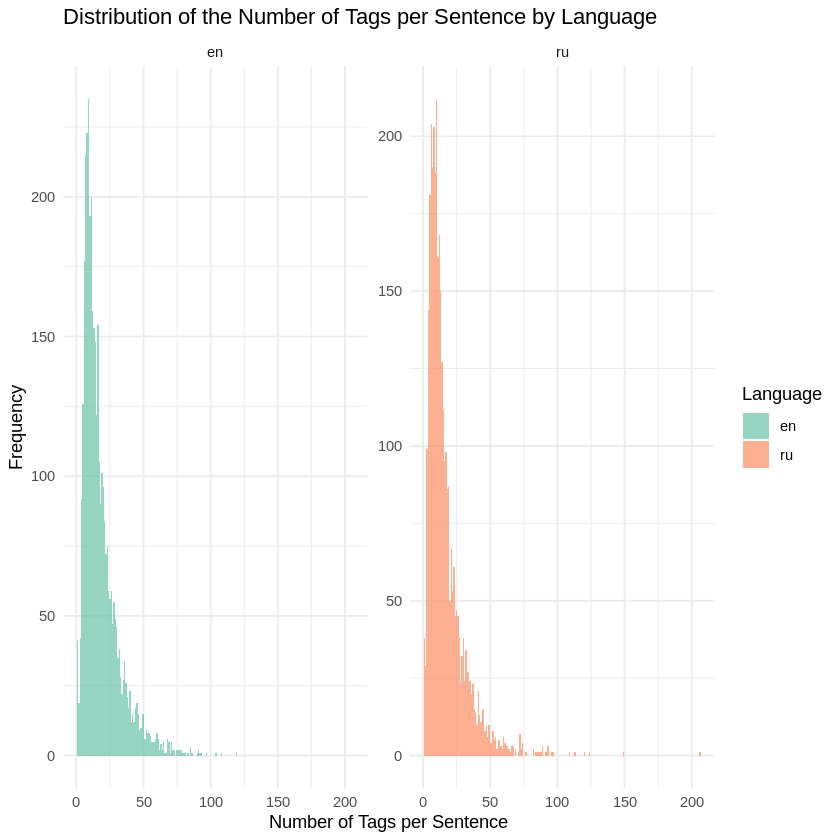

In [ ]:
visualize_avg_tag_count(data)

The English version has an average of 17.9 tags per sentence compared to 16.4 tags in the Russian version. This higher average tag count in English is consistent with the observed higher total number of tokens and sentences in the English translation.


* English syntax often requires more explicit markers of grammatical relationships, such as determiners, auxiliary verbs, and prepositions. This need for explicitness increases the number of syntactic tags, as each of these elements is tagged during syntactic analysis.

* Russian, on the other hand, tends to convey some of these relationships through inflection rather than separate words. For instance, Russian verbs can incorporate information about the subject, leading to fewer separate syntactic tags.

Both distributions exhibit a right-skewed pattern, indicating that most sentences have a relatively low number of tags, with a long tail extending towards higher tag counts.

The central peak for both English and Russian is around the 10-20 tags per sentence range. This central tendency aligns with the earlier provided average tag counts (17.9 for English and 16.4 for Russian).

The long tail in both distributions indicates that there are sentences with a very high number of tags, though these are less frequent.

The tail for English appears to be more extended, with some sentences reaching up to nearly 200 tags, possibly due to the inclusion of more auxiliary verbs, determiners, and other syntactic elements that require tagging.

# Analysis of Lolita

In [ ]:
data_lolita <- read_csv("/content/lolita_syntactic_dependencies.csv")

Rows: 11357 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (7): Sentence, Tokens, Lemmas, POS_Tags, Dependencies, Heads, Language
dbl (2): Text_ID, Sentence_Number

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [ ]:
head(data_lolita)

Text_ID,Sentence_Number,Sentence,Tokens,Lemmas,POS_Tags,Dependencies,Heads,Language
<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,1,* PART ONE *,"['*', 'PART', 'ONE', '*']","['*', 'part', 'one', '*']","['PUNCT', 'NOUN', 'NUM', 'PUNCT']","['punct', 'root', 'nummod', 'punct']","['PART', 'ROOT', 'PART', 'PART']",en
2,1,1,['1'],['1'],['NUM'],['root'],['ROOT'],en
7,1,2,['2'],['2'],['NUM'],['root'],['ROOT'],en
12,1,3,['3'],['3'],['NUM'],['root'],['ROOT'],en
4,1,"She was Lo, plain Lo, in the morning, standing four feet ten in one sock.","['She', 'was', 'Lo', ',', 'plain', 'Lo', ',', 'in', 'the', 'morning', ',', 'standing', 'four', 'feet', 'ten', 'in', 'one', 'sock', '.']","['she', 'be', 'Lo', ',', 'plain', 'Lo', ',', 'in', 'the', 'morning', ',', 'stand', 'four', 'foot', 'ten', 'in', 'one', 'sock', '.']","['PRON', 'AUX', 'PROPN', 'PUNCT', 'ADJ', 'PROPN', 'PUNCT', 'ADP', 'DET', 'NOUN', 'PUNCT', 'VERB', 'NUM', 'NOUN', 'NUM', 'ADP', 'NUM', 'NOUN', 'PUNCT']","['nsubj', 'cop', 'root', 'punct', 'compound', 'appos', 'punct', 'case', 'det', 'obl', 'punct', 'acl', 'nummod', 'obl:npmod', 'obl:npmod', 'case', 'nummod', 'obl', 'punct']","['Lo', 'Lo', 'ROOT', 'Lo', 'Lo', 'Lo', 'Lo', 'morning', 'morning', 'Lo', 'standing', 'Lo', 'feet', 'ten', 'standing', 'sock', 'sock', 'standing', 'Lo']",en
4,2,She was Lola in slacks.,"['She', 'was', 'Lola', 'in', 'slacks', '.']","['she', 'be', 'Lola', 'in', 'slack', '.']","['PRON', 'AUX', 'PROPN', 'ADP', 'NOUN', 'PUNCT']","['nsubj', 'cop', 'root', 'case', 'obl', 'punct']","['Lola', 'Lola', 'ROOT', 'slacks', 'Lola', 'Lola']",en


In [ ]:
str(data_lolita)

spc_tbl_ [11,357 × 9] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ Text_ID        : num [1:11357] 1 2 7 12 4 4 4 4 4 5 ...
 $ Sentence_Number: num [1:11357] 1 1 1 1 1 2 3 4 5 1 ...
 $ Sentence       : chr [1:11357] "* PART ONE *" "1" "2" "3" ...
 $ Tokens         : chr [1:11357] "['*', 'PART', 'ONE', '*']" "['1']" "['2']" "['3']" ...
 $ Lemmas         : chr [1:11357] "['*', 'part', 'one', '*']" "['1']" "['2']" "['3']" ...
 $ POS_Tags       : chr [1:11357] "['PUNCT', 'NOUN', 'NUM', 'PUNCT']" "['NUM']" "['NUM']" "['NUM']" ...
 $ Dependencies   : chr [1:11357] "['punct', 'root', 'nummod', 'punct']" "['root']" "['root']" "['root']" ...
 $ Heads          : chr [1:11357] "['PART', 'ROOT', 'PART', 'PART']" "['ROOT']" "['ROOT']" "['ROOT']" ...
 $ Language       : chr [1:11357] "en" "en" "en" "en" ...
 - attr(*, "spec")=
  .. cols(
  ..   Text_ID = col_double(),
  ..   Sentence_Number = col_double(),
  ..   Sentence = col_character(),
  ..   Tokens = col_character(),
  ..   Lemmas = col_character

In [ ]:
summary(data_lolita)

    Text_ID       Sentence_Number    Sentence            Tokens         
 Min.   :   1.0   Min.   : 1.000   Length:11357       Length:11357      
 1st Qu.: 314.0   1st Qu.: 1.000   Class :character   Class :character  
 Median : 731.0   Median : 3.000   Mode  :character   Mode  :character  
 Mean   : 747.2   Mean   : 5.174                                        
 3rd Qu.:1131.0   3rd Qu.: 7.000                                        
 Max.   :1652.0   Max.   :48.000                                        
    Lemmas            POS_Tags         Dependencies          Heads          
 Length:11357       Length:11357       Length:11357       Length:11357      
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                           


Table for language: en 
# A tibble: 10 × 3
   Language Dependencies  Freq
   <chr>    <chr>        <int>
 1 en       'case'       12335
 2 en       'det'        10450
 3 en       'nsubj'       9623
 4 en       'amod'        9077
 5 en       'advmod'      7035
 6 en       'obl'         6882
 7 en       'root'        5769
 8 en       'conj'        5589
 9 en       'obj'         5424
10 en       'cc'          4551

Table for language: ru 
# A tibble: 10 × 3
   Language Dependencies  Freq
   <chr>    <chr>        <int>
 1 ru       'case'       10933
 2 ru       'obl'        10855
 3 ru       'amod'       10133
 4 ru       'nsubj'       8937
 5 ru       'conj'        8177
 6 ru       'advmod'      7965
 7 ru       'root'        5588
 8 ru       'nmod'        5231
 9 ru       'obj'         4738
10 ru       'cc'          4654
# A tibble: 2 × 2
  Language Unique_Tags
  <chr>          <int>
1 en                50
2 ru                39


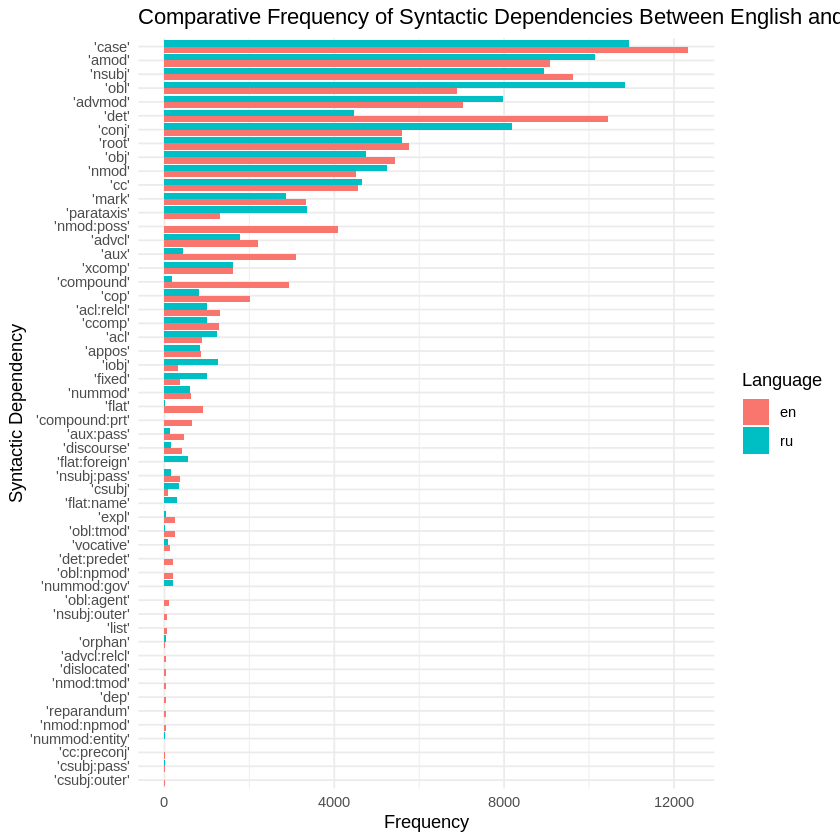

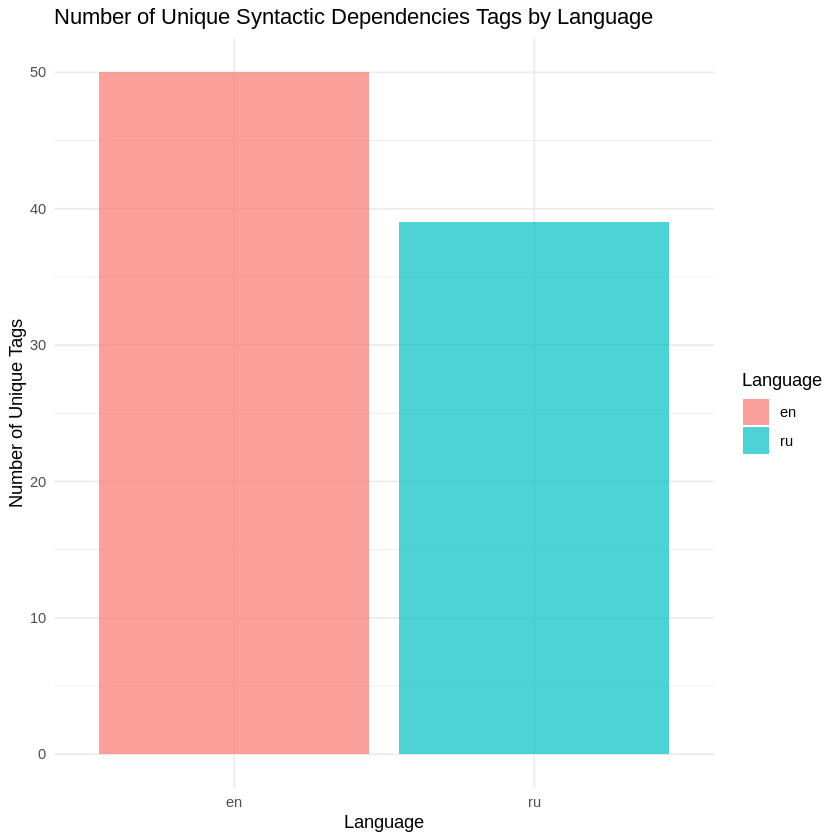

In [ ]:
process_and_visualize_dependencies(data_lolita)

The most frequent dependency in both languages is 'case', indicating a strong focus on grammatical relationships such as prepositional phrases and possessive constructions. This is followed closely by 'det' (determiners) in English and 'obl' in Russian.

Both 'amod' (adjectival modifiers) and 'advmod' (adverbial modifiers) are frequently used in both versions, reflecting Nabokov’s rich descriptive style. However, the slightly higher frequency of these tags in Russian ('amod' - 10133, 'advmod' - 7965) suggests that the translated text retains or even amplifies descriptive elements.

Both languages show significant use of 'conj' (conjuncts) and 'cc' (coordinating conjunctions), indicating Nabokov’s use of complex sentence structures with multiple clauses. The similar frequencies of these tags highlight the consistent narrative style in both languages.



# A tibble: 2 × 2
  Language Total_Sentences
  <chr>              <int>
1 en                  5769
2 ru                  5588
# A tibble: 2 × 2
  Language Total_Tokens
  <chr>           <int>
1 en             131017
2 ru             128424


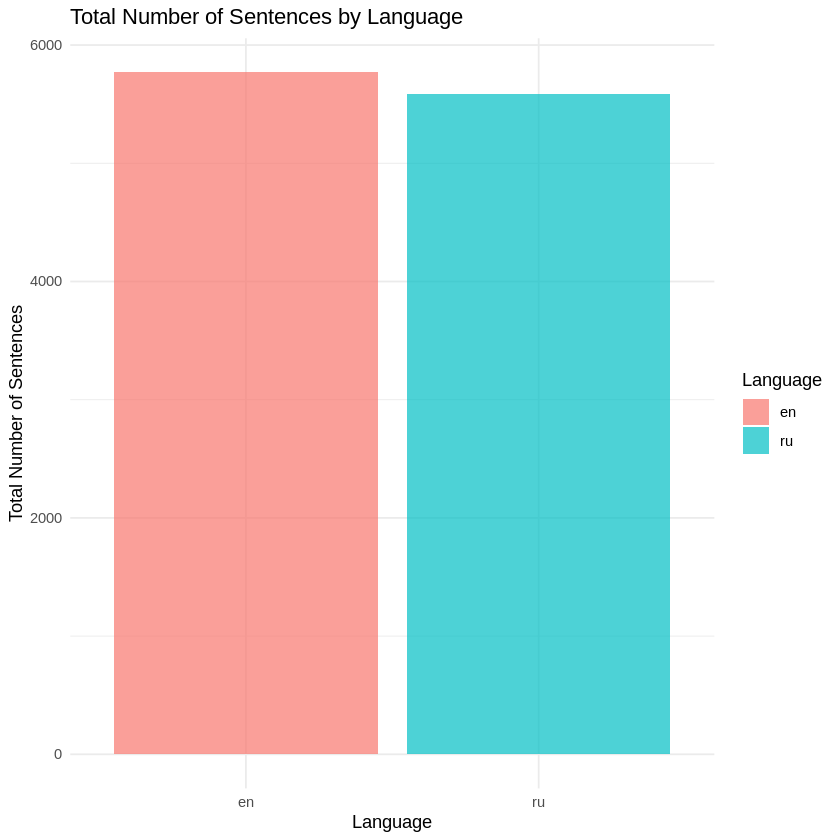

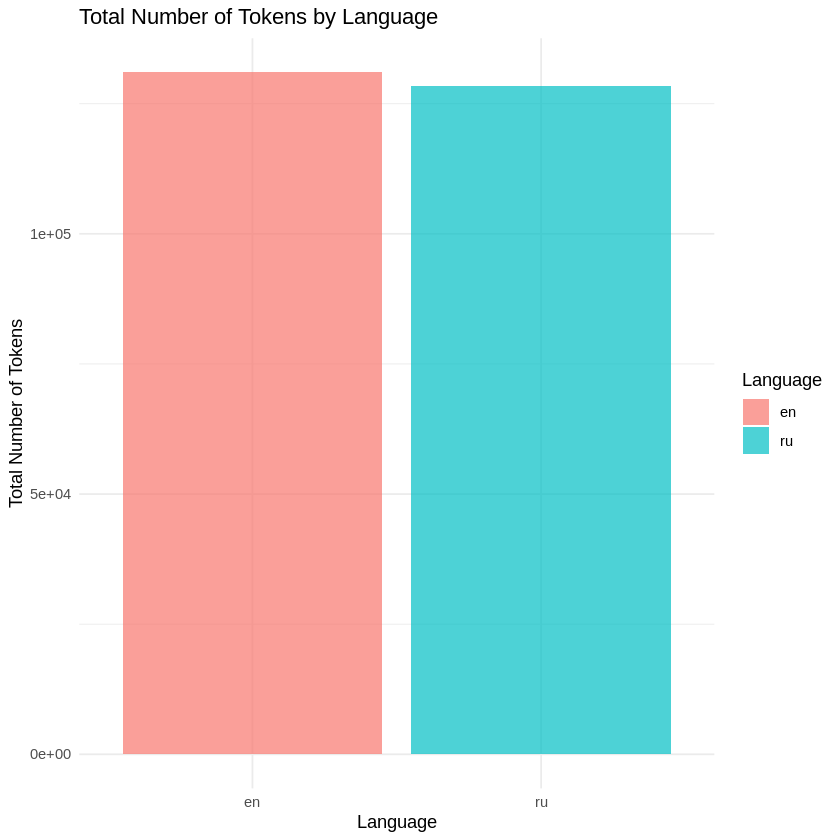

In [ ]:
visualize_total_sentences_and_tokens(data_lolita)

Similar statistics as for the "Laughter in the Dark"

# A tibble: 2 × 2
  Language Average_Tag_Count
  <chr>                <dbl>
1 en                    22.7
2 ru                    23.0


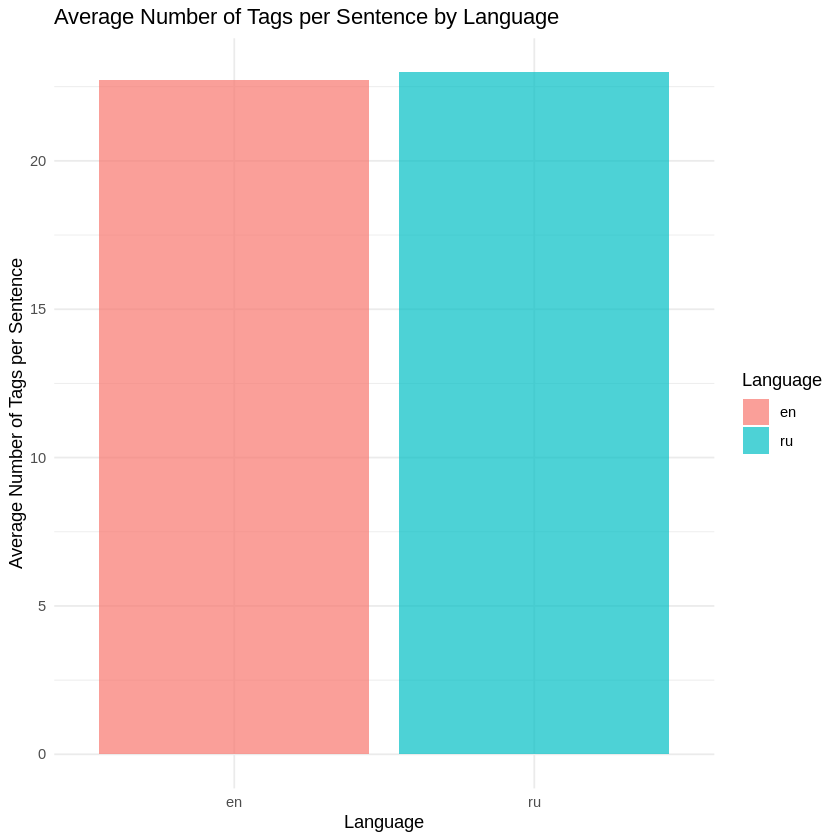

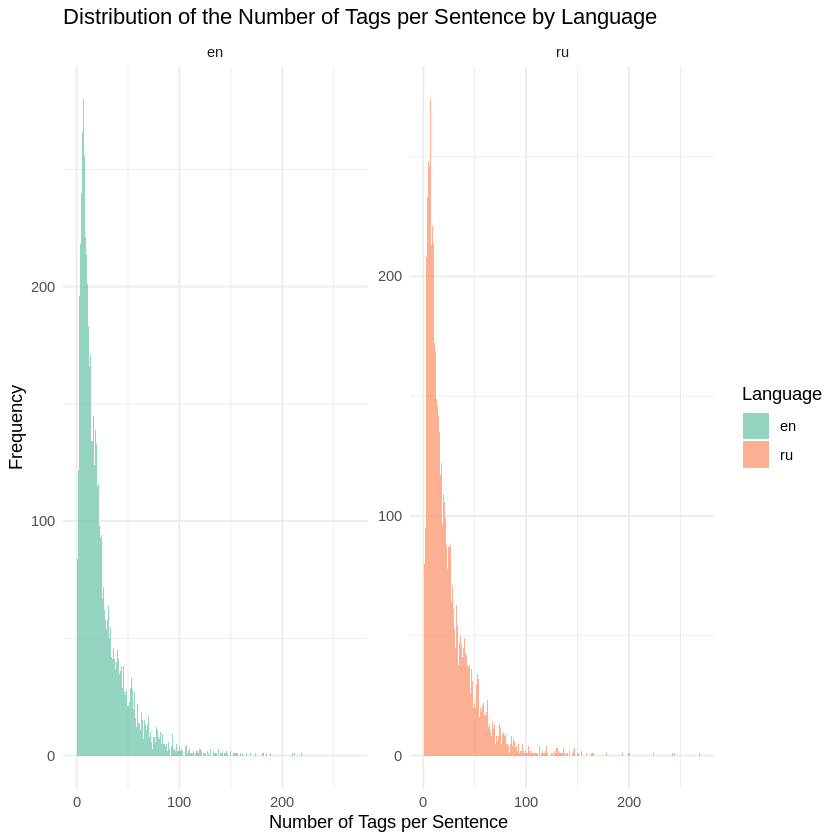

In [ ]:
visualize_avg_tag_count(data_lolita)

The average tag count per sentence is very close between English (22.7) and Russian (23.0), suggesting that Nabokov maintained a similar level of syntactic complexity in both versions.

Both distributions exhibit a pronounced peak at the lower end of the tag count spectrum, indicating that the majority of sentences in both versions are relatively simple in terms of syntactic structure.
The long tails extending towards higher tag counts highlight the presence of more complex sentences, though these are less frequent.

# A tibble: 2 × 2
  Language Average_Word_Count
  <chr>                 <dbl>
1 en                     19.4
2 ru                     18.4


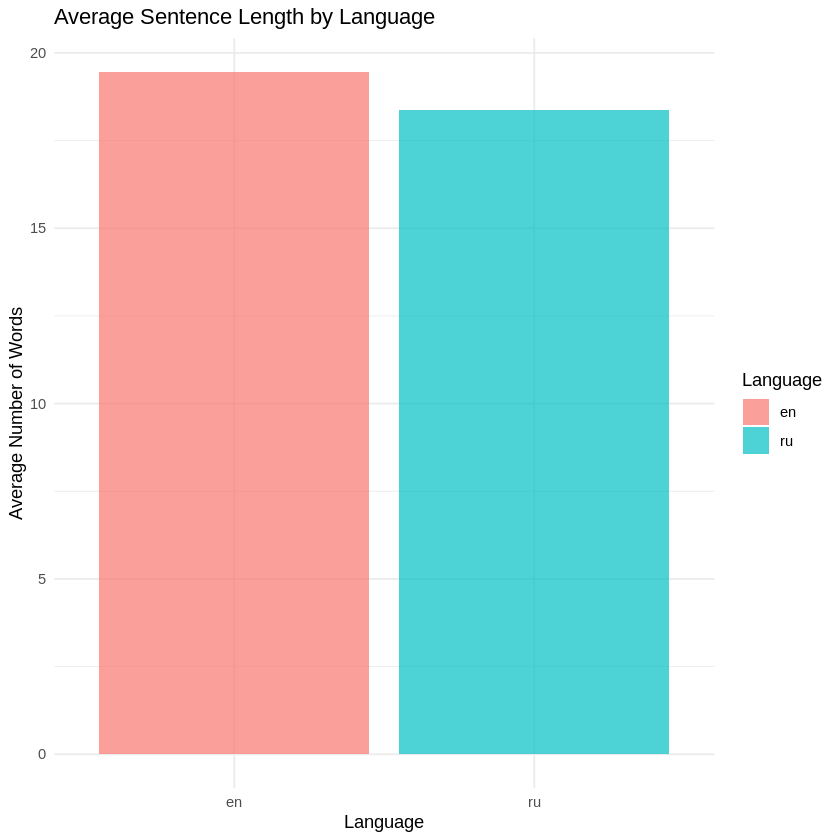

In [ ]:
visualize_avg_sentence_length(data_lolita)

The English version has a slightly higher average sentence length (19.4 words) compared to the Russian version (18.4 words). This suggests that Nabokov's English sentences tend to be a bit longer, potentially incorporating more elements such as articles, auxiliary verbs, and prepositional phrases which are more frequently used in English.